# Deepfake Forensics: End-to-End Analysis

This notebook demonstrates a complete forensic analysis pipeline for detecting AI-generated images. We utilize three distinct forensic filters:
1. **FFT (Fast Fourier Transform)**: Analyzes frequency domain artifacts.
2. **DWT (Discrete Wavelet Transform)**: Examines high-frequency anomalies in the HH band.
3. **SRM (Spatial Rich Models)**: Extracts residual noise patterns.

Each image is scored based on these fingerprints, and a final report is generated.

In [1]:
import os
import sys
import matplotlib.pyplot as plt

# Add project root to path
sys.path.append(os.path.abspath('..'))

from src import (
    load_image, 
    list_images, 
    ensure_dir,
    dwt_fingerprint, 
    fft_fingerprint, 
    srm_fingerprint,
    score_fft, 
    score_dwt, 
    score_srm, 
    combined_score,
    generate_report,
    show_fingerprint_grid
)
from src.config import REAL_DIR, FAKE_DIR


In [2]:
def analyze_image(image_path, label=""):
    """
    Runs the full forensic pipeline on a single image.
    """
    print(f"\n{'='*60}")
    print(f"📸 Analyzing: {os.path.basename(image_path)}")
    if label:
        print(f"   Label: {label}")
    print(f"{'='*60}")
    
    # 1. Load Image
    try:
        img = load_image(image_path)
        print(f"✅ Image loaded: {img.shape}")
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

    # 2. Compute Fingerprints
    print("\n🔍 Computing forensic fingerprints...")
    fft_map = fft_fingerprint(img)
    print(f"   FFT: {fft_map.shape}")
    
    dwt_map = dwt_fingerprint(img)
    print(f"   DWT: {dwt_map.shape}")
    
    srm_map = srm_fingerprint(img)
    print(f"   SRM: {srm_map.shape}")
    
    # 3. Calculate Scores
    print("\n📊 Calculating scores...")
    s_fft = score_fft(fft_map)
    s_dwt = score_dwt(dwt_map)
    s_srm = score_srm(srm_map)
    final = combined_score(s_fft, s_dwt, s_srm)
    
    scores = {
        "fft": s_fft,
        "dwt": s_dwt,
        "srm": s_srm,
        "combined": final
    }
    
    # 4. Generate Report
    print("\n📋 Forensic Report:")
    report = generate_report(image_path, scores)
    
    # 5. Visualize
    print("\n🎨 Generating visualization...")
    show_fingerprint_grid(img, fft_map, dwt_map, srm_map)
    
    return scores

## 2. Analyze All Fake Images

Process all images in the `images/fake/` directory.


############################################################
# FAKE IMAGES ANALYSIS
############################################################

Found 1 fake image(s) in c:\Users\raghu\OneDrive\Desktop\Deepfake-Forensics-in-the-wild\images\fake

📸 Analyzing: fake-cat-sunset.jpg
   Label: FAKE
✅ Image loaded: (388, 620, 3)

🔍 Computing forensic fingerprints...
   FFT: (388, 620)
   DWT: (197, 313, 4)
   SRM: (388, 620, 3)

📊 Calculating scores...

📋 Forensic Report:
{
  "image_path": "c:\\Users\\raghu\\OneDrive\\Desktop\\Deepfake-Forensics-in-the-wild\\images\\fake\\fake-cat-sunset.jpg",
  "fft_score": 0.069417,
  "dwt_score": 0.466257,
  "srm_score": 0.055539,
  "combined_score": 0.166545,
  "interpretation": "Likely real image"
}

🎨 Generating visualization...


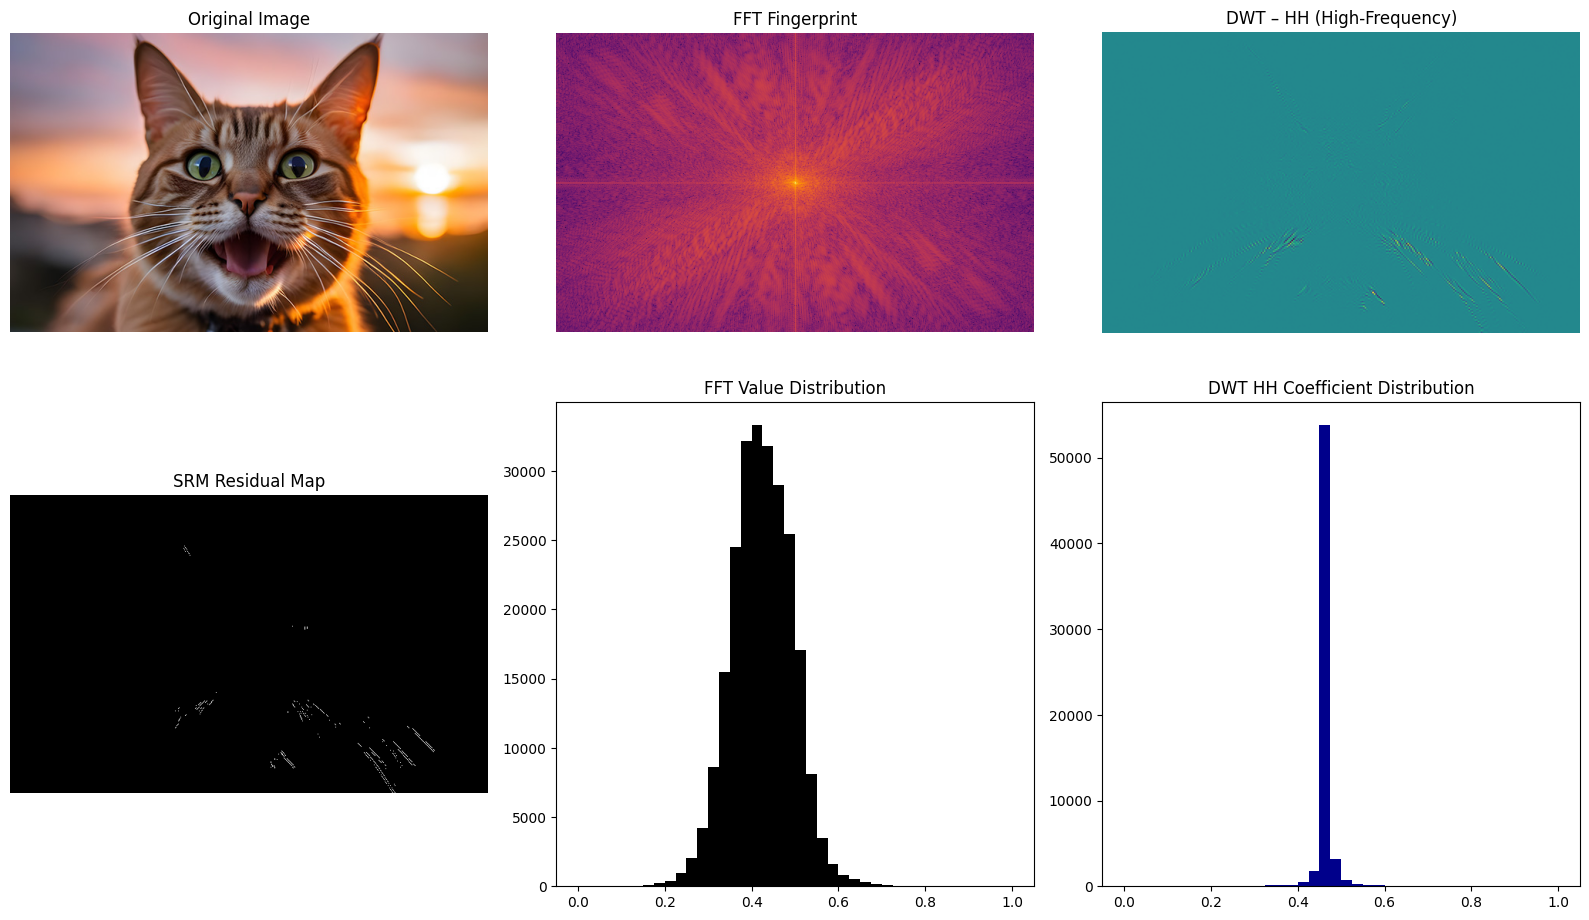

In [5]:
print("\n" + "#"*60)
print("# FAKE IMAGES ANALYSIS")
print("#"*60)

fake_images = list_images(FAKE_DIR)
print(f"\nFound {len(fake_images)} fake image(s) in {FAKE_DIR}")

fake_scores = []
if fake_images:
    for img_path in fake_images:
        scores = analyze_image(img_path, label="FAKE")
        if scores:
            fake_scores.append(scores)
else:
    print(f"⚠️  No images found in {FAKE_DIR}")
    print("   Please add fake images to test the pipeline.")

## Summary

This notebook has demonstrated:
- ✅ Loading and processing images from real/fake directories
- ✅ Applying three forensic filters (FFT, DWT, SRM)
- ✅ Calculating forensic scores for each image
- ✅ Generating detailed reports
- ✅ Visualizing fingerprints with comprehensive grids
- ✅ Comparative analysis between real and fake images